In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
import time
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
from sklearn.metrics import precision_score,recall_score,f1_score,matthews_corrcoef,roc_curve
from sklearn.decomposition import PCA
import sklearn.externals
import joblib
#KNN

In [3]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_columns', None)
sns.set_theme(style="darkgrid")
sns.set(font_scale = 2)

from sklearn.linear_model import LogisticRegression

# EDA

In [4]:
Disease_data= pd.read_csv('E:/Algo/ML projects/Disease Prediction/infectious_disease_outbreaks.csv')

In [55]:
Disease_data_EDA = Disease_data

In [129]:
Disease_data_2= pd.read_csv('E:/Algo/ML projects/Disease Prediction/infectious_disease_outbreaks.csv')

In [5]:
Disease_data

,Date,Location,Disease_Type,Number_of_Cases,Severity_Level,Population_Density,Climate_Type,Health_Infrastructure,Government_Response,Socioeconomic_Status,Travel_Restrictions,Healthcare_Availability,Vaccination_Coverage,Public_Awareness_Campaigns,Outcome
0,2018-03-07,South Africa,Cholera,805,Low,High,Tropical,Poor,Effective,Medium,Implemented,Limited,89,Yes,Contained
1,1988-05-31,South Africa,Measles,515,High,Medium,Tropical,Poor,Moderate,Medium,Implemented,Excellent,67,Yes,Contained
2,1999-07-10,South Africa,Ebola Virus (EVD),547,Medium,High,Tropical,Moderate,Effective,High,Implemented,Adequate,100,No,Epidemic
3,2011-11-03,South Africa,"Hepatitis (A, B, C)",960,Medium,Low,Temperate,Poor,Effective,High,Not Implemented,Limited,50,No,Epidemic
4,2008-02-13,South Africa,Zika Virus,162,Low,High,Temperate,Moderate,Ineffective,Medium,Not Implemented,Adequate,2,No,Pandemic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2010-05-09,South Africa,HIV/AIDS,30,Low,Low,Tropical,Poor,Effective,Medium,Implemented,Limited,35,Yes,Epidemic
2996,1992-12-22,South Africa,Dengue Fever,264,High,Medium,Temperate,Poor,Moderate,Low,Not Implemented,Limited,61,Yes,Contained
2997,1987-01-26,South Africa,Influenza (Flu),530,Medium,High,Temperate,Moderate,Effective,Medium,Implemented,Adequate,13,No,Contained
2998,1999-01-29,South Africa,Tuberculosis (TB),888,Medium,High,Tropical,Good,Moderate,Low,Implemented,Excellent,65,Yes,Pandemic


In [109]:
Disease_data.describe()

,Date,Number_of_Cases,Vaccination_Coverage,Date_Label,Number_of_Cases_Label,Disease_Type_Label,Severity_Level_Label,Population_Density_Label,Climate_Type_Label,Health_Infrastructure_Label,Government_Response_Label,Socioeconomic_Status_Label,Travel_Restrictions_Label,Healthcare_Availability_Label,Vaccination_Coverage_Label,Public_Awareness_Campaigns_Label,Outcome_Label,Month
count,3000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1999-10-20 07:18:14.400000,503.41200,49.820333,1349.082667,478.800667,4.545333,1.020667,1.006667,0.498333,1.001000,1.016000,0.976333,0.508667,1.005333,49.820333,0.489667,0.994667,6.537667
min,1980-01-05 00:00:00,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1989-10-19 12:00:00,254.00000,25.000000,677.750000,239.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,4.000000
50%,1999-07-17 12:00:00,508.00000,50.000000,1346.500000,483.000000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,0.000000,1.000000,7.000000
75%,2009-09-18 00:00:00,755.00000,74.000000,2022.000000,720.000000,7.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,74.000000,1.000000,2.000000,9.000000
max,2019-12-16 00:00:00,1000.00000,100.000000,2700.000000,958.000000,9.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,100.000000,1.000000,2.000000,12.000000
std,NaN,288.22083,28.775685,779.669750,276.648355,2.839243,0.810221,0.817422,0.500081,0.817652,0.814841,0.817718,0.500008,0.810467,28.775685,0.499977,0.814980,3.411128


In [130]:
Disease_data_2['Date'] = pd.to_datetime(Disease_data_2['Date'])
Disease_data_2['Date'] = pd.to_datetime(Disease_data_2['Date'], format='%d-%m-%Y')

categorical_columns = ['Location', 'Disease_Type', 'Severity_Level','Population_Density','Climate_Type','Health_Infrastructure','Government_Response', 'Socioeconomic_Status', 'Travel_Restrictions','Healthcare_Availability','Public_Awareness_Campaigns','Outcome']  # List all categorical columns

In [131]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    Disease_data_2[column] = label_encoder.fit_transform(Disease_data_2[column])

In [132]:
Disease_data_2.head()

,Date,Location,Disease_Type,Number_of_Cases,Severity_Level,Population_Density,Climate_Type,Health_Infrastructure,Government_Response,Socioeconomic_Status,Travel_Restrictions,Healthcare_Availability,Vaccination_Coverage,Public_Awareness_Campaigns,Outcome
0,2018-03-07,0,0,805,1,0,1,2,0,2,0,2,89,1,0
1,1988-05-31,0,7,515,0,2,1,2,2,2,0,1,67,1,0
2,1999-07-10,0,2,547,2,0,1,1,0,0,0,0,100,0,1
3,2011-11-03,0,4,960,2,1,0,2,0,0,1,2,50,0,1
4,2008-02-13,0,9,162,1,0,0,1,1,2,1,0,2,0,2


In [6]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode categorical variable 'Disease_Type' into numerical labels
Disease_data['Date_Label'] = label_encoder.fit_transform(Disease_data['Date'])
Disease_data['Number_of_Cases_Label'] = label_encoder.fit_transform(Disease_data['Number_of_Cases'])
Disease_data['Disease_Type_Label'] = label_encoder.fit_transform(Disease_data['Disease_Type'])
Disease_data['Severity_Level_Label'] = label_encoder.fit_transform(Disease_data['Severity_Level'])
Disease_data['Population_Density_Label'] = label_encoder.fit_transform(Disease_data['Population_Density'])
Disease_data['Climate_Type_Label'] = label_encoder.fit_transform(Disease_data['Climate_Type'])
Disease_data['Health_Infrastructure_Label'] = label_encoder.fit_transform(Disease_data['Health_Infrastructure'])
Disease_data['Government_Response_Label'] = label_encoder.fit_transform(Disease_data['Government_Response'])
Disease_data['Socioeconomic_Status_Label'] = label_encoder.fit_transform(Disease_data['Socioeconomic_Status'])
Disease_data['Travel_Restrictions_Label'] = label_encoder.fit_transform(Disease_data['Travel_Restrictions'])
Disease_data['Healthcare_Availability_Label'] = label_encoder.fit_transform(Disease_data['Healthcare_Availability'])
Disease_data['Vaccination_Coverage_Label'] = label_encoder.fit_transform(Disease_data['Vaccination_Coverage'])
Disease_data['Public_Awareness_Campaigns_Label'] = label_encoder.fit_transform(Disease_data['Public_Awareness_Campaigns'])
Disease_data['Outcome_Label'] = label_encoder.fit_transform(Disease_data['Outcome'])

In [122]:
Disease_data_numerical = Disease_data [['Date_Label', 'Number_of_Cases', 'Disease_Type_Label', 'Severity_Level_Label', 'Population_Density_Label', 'Climate_Type_Label', 'Health_Infrastructure_Label', 'Government_Response_Label', 'Socioeconomic_Status_Label', 'Travel_Restrictions_Label', 'Healthcare_Availability_Label', 'Vaccination_Coverage_Label', 'Public_Awareness_Campaigns_Label', 'Outcome_Label']]

In [123]:
Disease_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 156 to 215
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              3000 non-null   datetime64[ns]
 1   Location                          3000 non-null   int64         
 2   Disease_Type                      3000 non-null   int64         
 3   Number_of_Cases                   3000 non-null   int64         
 4   Severity_Level                    3000 non-null   int64         
 5   Population_Density                3000 non-null   int64         
 6   Climate_Type                      3000 non-null   int64         
 7   Health_Infrastructure             3000 non-null   int64         
 8   Government_Response               3000 non-null   int64         
 9   Socioeconomic_Status              3000 non-null   int64         
 10  Travel_Restrictions               3000 non-null   in

In [9]:
#Disease_data_numerical['Date'] = pd.to_datetime(Disease_data_numerical['Date'])

In [133]:
Disease_data_3 = Disease_data_2.drop('Date', axis=1)

In [134]:
Disease_data_3.dtypes

Location                      int32
Disease_Type                  int32
Number_of_Cases               int64
Severity_Level                int32
Population_Density            int32
Climate_Type                  int32
Health_Infrastructure         int32
Government_Response           int32
Socioeconomic_Status          int32
Travel_Restrictions           int32
Healthcare_Availability       int32
Vaccination_Coverage          int64
Public_Awareness_Campaigns    int32
Outcome                       int32
dtype: object

In [136]:
# Split the data into features (X) and target variable (y)
X = Disease_data_3.drop('Outcome', axis=1)
y = Disease_data_3['Outcome']

In [137]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [138]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Machine Learning Models

In [161]:
import plotly.express as px
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Generate sample data for demonstration
X, y = make_classification(n_samples=3000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Initialize classifiers
svm_model = SVC(kernel='linear')
rf_model = RandomForestClassifier(n_estimators=100)
log_reg = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=5)
mlp = MLPClassifier(random_state=42)

models = {
    "SVM": svm_model,
    "Random Forest": rf_model,
    "Logistic Regression": log_reg,
    "KNN": knn_model,
    "Neural Network": mlp  # Adding the MLP classifier to the models dictionary
}

# Setting 5-fold cross-validation
kf = StratifiedKFold(n_splits=5)
model_accuracies = {}

for model_name, model in models.items():
    fold = 0
    accuracies = []
    print(f"Training {model_name}...")
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        fold += 1
        print(f"Fold {fold}: Accuracy = {accuracy:.2f}")

    avg_accuracy = np.mean(accuracies)
    model_accuracies[model_name] = avg_accuracy
    print(f"Average Accuracy of {model_name}: {avg_accuracy:.2f}\n")

# Convert the dictionary to a DataFrame for plotting
df_accuracies = pd.DataFrame.from_dict(model_accuracies, orient='index', columns=['Accuracy'])
df_accuracies.reset_index(inplace=True)
df_accuracies.rename(columns={'index': 'Model'}, inplace=True)

# Define custom colors for each model
colors = px.colors.qualitative.Set3[:len(df_accuracies)]

# Plotting the bar graph with custom colors
fig = px.bar(df_accuracies, x='Model', y='Accuracy', title='Model Accuracies', color='Model', color_discrete_sequence=colors)
fig.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.7)
fig.update_layout(xaxis_title='Model', yaxis_title='Accuracy', yaxis_tickformat="%")

# Show the plot
fig.show()


Training SVM...
Fold 1: Accuracy = 0.97
Fold 2: Accuracy = 0.98
Fold 3: Accuracy = 0.97
Fold 4: Accuracy = 0.97
Fold 5: Accuracy = 0.97
Average Accuracy of SVM: 0.97

Training Random Forest...
Fold 1: Accuracy = 0.99
Fold 2: Accuracy = 0.98
Fold 3: Accuracy = 0.98
Fold 4: Accuracy = 0.98
Fold 5: Accuracy = 0.98
Average Accuracy of Random Forest: 0.98

Training Logistic Regression...
Fold 1: Accuracy = 0.97
Fold 2: Accuracy = 0.98
Fold 3: Accuracy = 0.97
Fold 4: Accuracy = 0.97
Fold 5: Accuracy = 0.97
Average Accuracy of Logistic Regression: 0.97

Training KNN...
Fold 1: Accuracy = 0.97
Fold 2: Accuracy = 0.98
Fold 3: Accuracy = 0.96
Fold 4: Accuracy = 0.97
Fold 5: Accuracy = 0.96
Average Accuracy of KNN: 0.97

Training Neural Network...
Fold 1: Accuracy = 0.98
Fold 2: Accuracy = 0.98
Fold 3: Accuracy = 0.97
Fold 4: Accuracy = 0.97
Fold 5: Accuracy = 0.96
Average Accuracy of Neural Network: 0.97



# Correlation Matrices

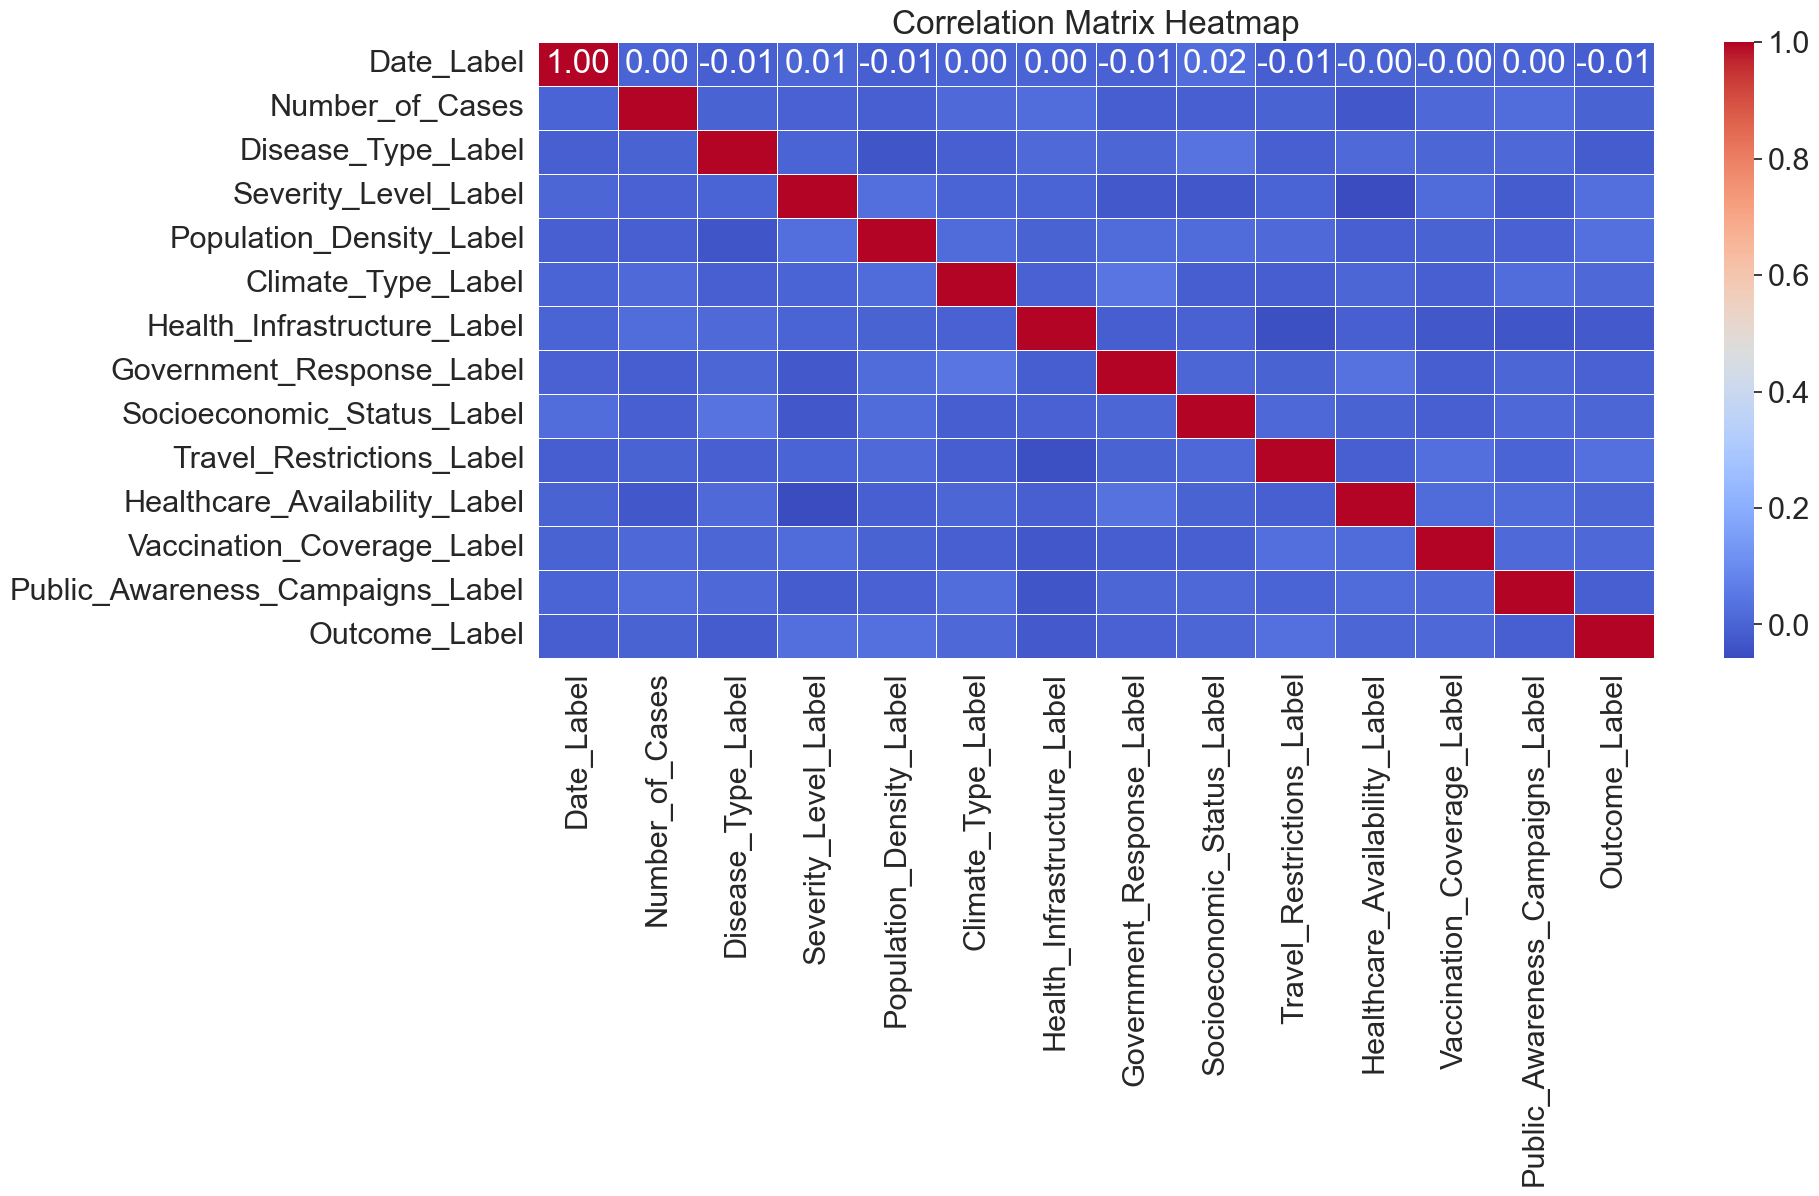

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation analysis
numerical_cols = Disease_data_numerical.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numerical_cols.corr()

# Set up the heatmap figure size
plt.figure(figsize=(18, 8))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Analyzing Trend

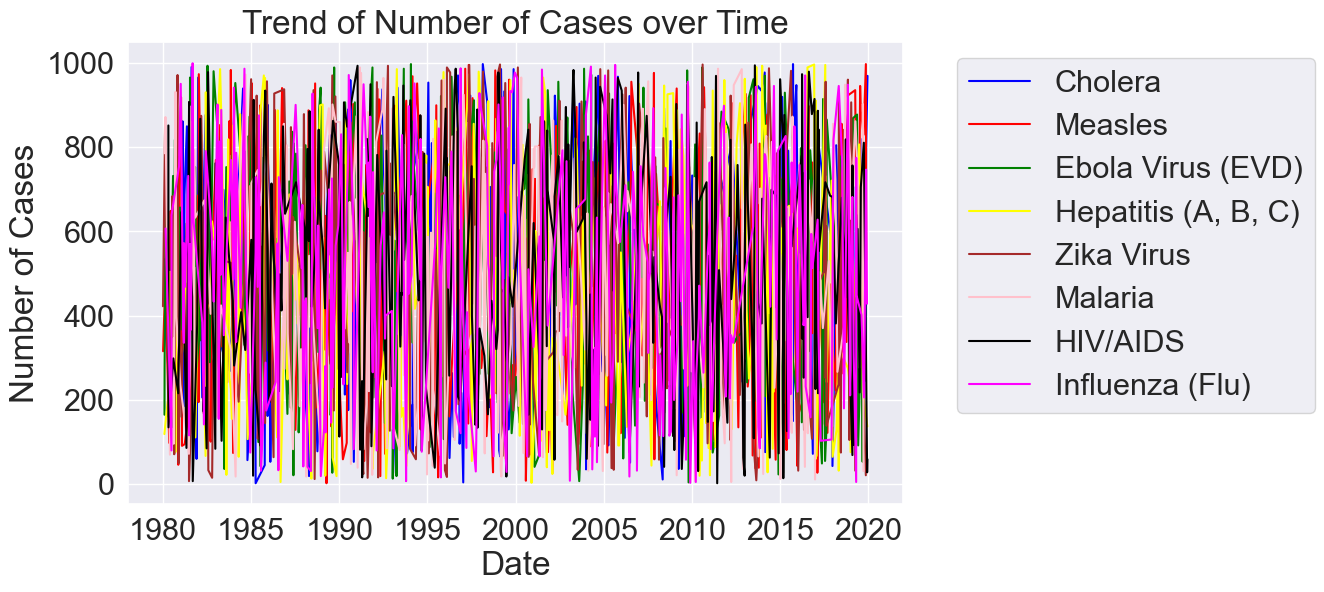

In [68]:
# Sort DataFrame by Date
Disease_data_EDA.sort_values(by='Date', inplace=True)
import pandas as pd
import matplotlib.pyplot as plt

# Convert the date column to datetime format
Disease_data_EDA['Date'] = pd.to_datetime(Disease_data_EDA['Date'])


# Define colors for different diseases
disease_colors = {
    'Cholera': 'blue',
    'Measles': 'red',
    'Ebola Virus (EVD)': 'green',
    'Hepatitis (A, B, C)': 'yellow',
    'Zika Virus': 'brown',
    'Malaria': 'pink',
    'HIV/AIDS': 'black',
    'Influenza (Flu)': 'magenta',
}

# Set up the figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot each disease type with its specified color
for disease, color in disease_colors.items():
    df_disease = Disease_data_EDA[Disease_data_EDA['Disease_Type'] == disease]
    ax.plot(df_disease['Date'], df_disease['Number_of_Cases'], label=disease, color=color)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Trend of Number of Cases over Time')

# Show legend
#plt.legend()
# Add legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Show plot
plt.show()



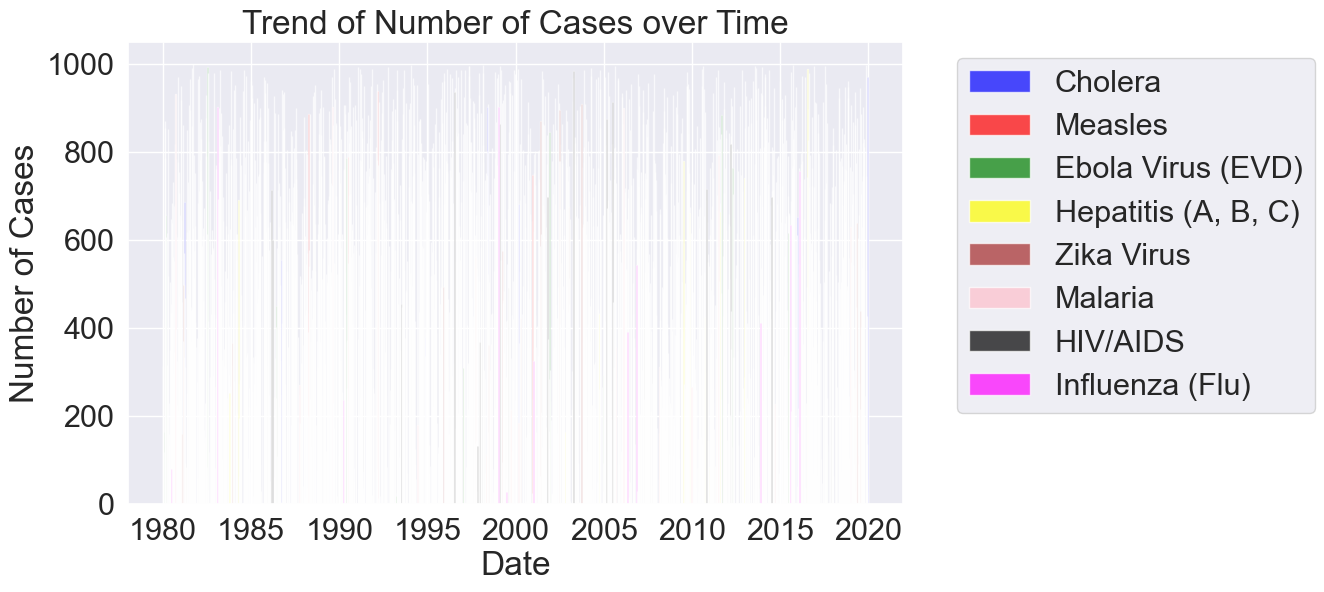

In [66]:
# Sort DataFrame by Date
Disease_data_EDA.sort_values(by='Date', inplace=True)
import pandas as pd
import matplotlib.pyplot as plt

# Convert the date column to datetime format
Disease_data_EDA['Date'] = pd.to_datetime(Disease_data_EDA['Date'])


# Define colors for different diseases
disease_colors = {
    'Cholera': 'blue',
    'Measles': 'red',
    'Ebola Virus (EVD)': 'green',
    'Hepatitis (A, B, C)': 'yellow',
    'Zika Virus': 'brown',
    'Malaria': 'pink',
    'HIV/AIDS': 'black',
    'Influenza (Flu)': 'magenta',
}

# Set up the figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Iterate over each disease type and plot as a bar with specified color
for disease, color in disease_colors.items():
    df_disease = Disease_data_EDA[Disease_data_EDA['Disease_Type'] == disease]
    ax.bar(df_disease['Date'], df_disease['Number_of_Cases'], label=disease, color=color, alpha=0.7)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Trend of Number of Cases over Time')

# Show legend
plt.legend()
# Add legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Show plot
plt.show()

Season based on the date

In [56]:
import pandas as pd

# Convert 'Date' column to datetime
Disease_data_EDA['Date'] = pd.to_datetime(Disease_data_EDA['Date'])

# Extract month from date
Disease_data_EDA['Month'] = Disease_data_EDA['Date'].dt.month

# Define a function to map month to season
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Apply the function to create the 'Season' column
Disease_data_EDA['Season'] = Disease_data_EDA['Month'].apply(get_season)

# Display the DataFrame with the new 'Season' column
#print(Disease_data_EDA)

# Get total count of each season
season_counts = Disease_data_EDA['Season'].value_counts()

# Display the count of each season
print(season_counts)

Season
Summer    814
Spring    745
Winter    726
Fall      715
Name: count, dtype: int64


In [58]:
# Group by 'Season' and 'Disease_Type', then count occurrences
disease_season_counts = Disease_data_EDA.groupby(['Season', 'Disease_Type']).size()

# Display the counts of diseases in each season
disease_season_counts.head(30)

Season  Disease_Type       
Fall    Cholera                 68
        Dengue Fever            64
        Ebola Virus (EVD)       69
        HIV/AIDS                61
        Hepatitis (A, B, C)     77
        Influenza (Flu)         67
        Malaria                 80
        Measles                 90
        Tuberculosis (TB)       82
        Zika Virus              57
Spring  Cholera                 69
        Dengue Fever            73
        Ebola Virus (EVD)       75
        HIV/AIDS                63
        Hepatitis (A, B, C)     63
        Influenza (Flu)         68
        Malaria                 74
        Measles                102
        Tuberculosis (TB)       77
        Zika Virus              81
Summer  Cholera                 72
        Dengue Fever            87
        Ebola Virus (EVD)       99
        HIV/AIDS                76
        Hepatitis (A, B, C)     81
        Influenza (Flu)         89
        Malaria                 73
        Measles            

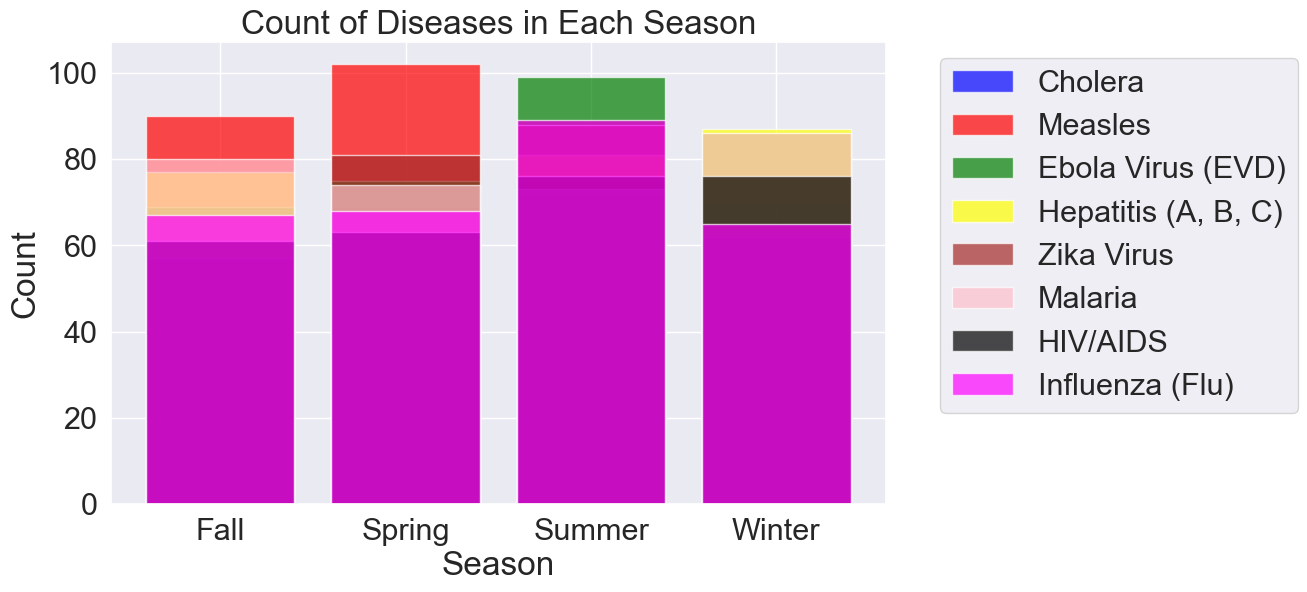

In [65]:
# Convert the result to a DataFrame for easier plotting
df_counts = disease_season_counts.reset_index(name='Count')

# Define colors for different diseases
disease_colors = {
    'Cholera': 'blue',
    'Measles': 'red',
    'Ebola Virus (EVD)': 'green',
    'Hepatitis (A, B, C)': 'yellow',
    'Zika Virus': 'brown',
    'Malaria': 'pink',
    'HIV/AIDS': 'black',
    'Influenza (Flu)': 'magenta',
}

# Plotting the graph for each disease in each season
plt.figure(figsize=(10, 6))

for disease, color in disease_colors.items():
    df_disease = df_counts[df_counts['Disease_Type'] == disease]
    plt.bar(df_disease['Season'], df_disease['Count'], label=disease, color=color, alpha=0.7)

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Count of Diseases in Each Season')


# Add legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

In [69]:

df = pd.DataFrame(Disease_data_EDA)

# Extract year and month from 'Date' column
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

# One-hot encoding for 'Disease_Type'
df_encoded = pd.get_dummies(df, columns=['Disease_Type'], prefix='Disease')

# Calculating case severity based on 'Number_of_Cases'
df['Case_Severity'] = pd.cut(df['Number_of_Cases'], bins=[0, 100, 200, float('inf')], labels=['Low', 'Medium', 'High'])

# Display the updated DataFrame
print(df_encoded)


           Date      Location  Number_of_Cases Severity_Level  \
156  1980-01-05  South Africa              422         Medium   
1226 1980-01-07  South Africa              315           High   
627  1980-01-16  South Africa              931            Low   
146  1980-01-20  South Africa              876         Medium   
1113 1980-01-30  South Africa              663            Low   
...         ...           ...              ...            ...   
2516 2019-12-05  South Africa              428           High   
2172 2019-12-08  South Africa               27         Medium   
1938 2019-12-12  South Africa              136            Low   
292  2019-12-14  South Africa               58            Low   
215  2019-12-16  South Africa              970         Medium   

     Population_Density Climate_Type Health_Infrastructure  \
156              Medium    Temperate                  Good   
1226             Medium     Tropical              Moderate   
627                 Low    Temper

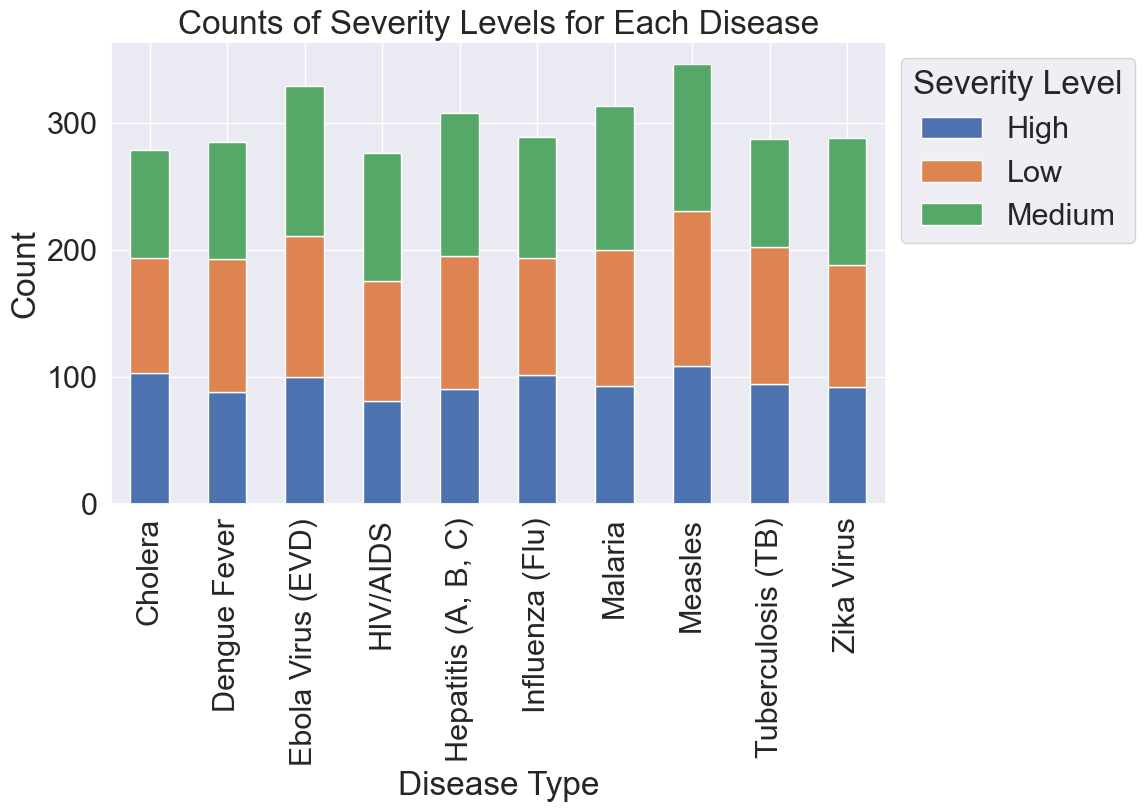

In [72]:
# Group by 'Disease_Type' and 'Severity_Level', then count occurrences
severity_counts = df.groupby(['Disease_Type', 'Severity_Level']).size().unstack(fill_value=0)

# Plotting the bar chart
severity_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.title('Counts of Severity Levels for Each Disease')

# Show plot
plt.legend(title='Severity Level', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

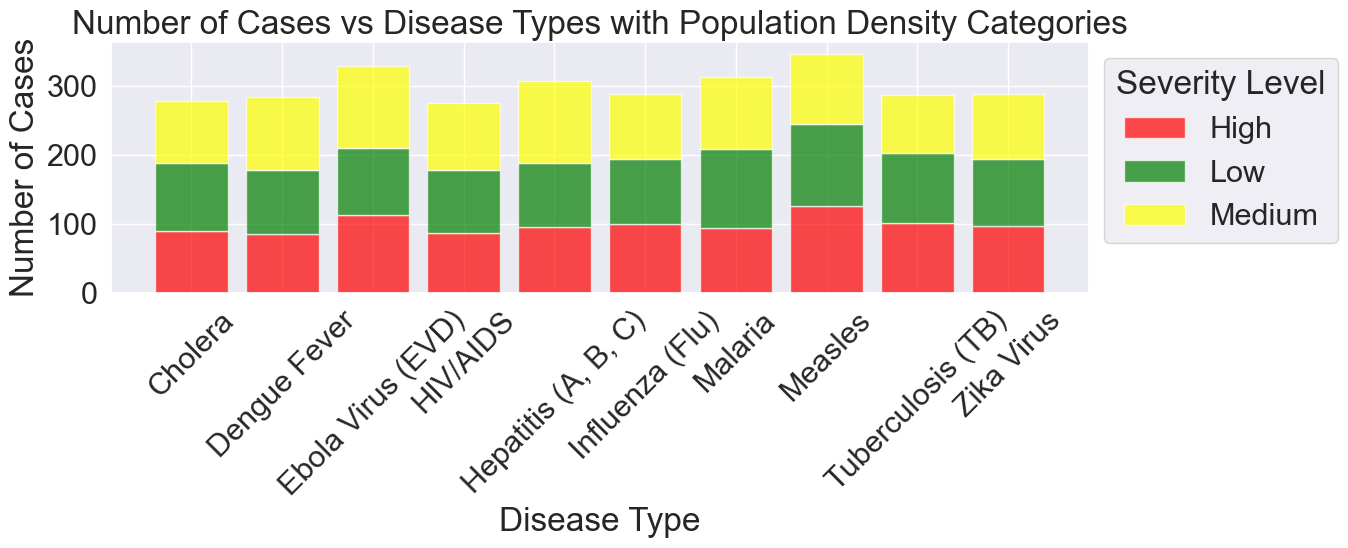

In [82]:
df = pd.DataFrame(Disease_data_EDA)

# Categorize population density into low, medium, and high
#df['Population_Category'] = pd.cut(df['Population_Density'], bins=[0, 150, 250, float('inf')],
                                    #labels=['Low', 'Medium', 'High'])

# Group by 'Disease_Type' and 'Population_Category', then count occurrences
density_counts = df.groupby(['Disease_Type', 'Population_Density']).size().unstack(fill_value=0)

# Plotting the bar chart
plt.figure(figsize=(14, 6))
bottom = None  # Variable to track the bottom of each bar
colors = {'Low': 'green', 'Medium': 'yellow', 'High': 'red'}

for cat in density_counts.columns:
    plt.bar(density_counts.index, density_counts[cat], label=cat, color=colors[cat], alpha=0.7, bottom=bottom)
    if bottom is None:
        bottom = density_counts[cat].values
    else:
        bottom += density_counts[cat].values

# Add labels and title
plt.xlabel('Disease Type')
plt.ylabel('Number of Cases')
plt.title('Number of Cases vs Disease Types with Population Density Categories')

# Show legend
plt.legend(title='Severity Level', bbox_to_anchor=(1, 1), loc='upper left')

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

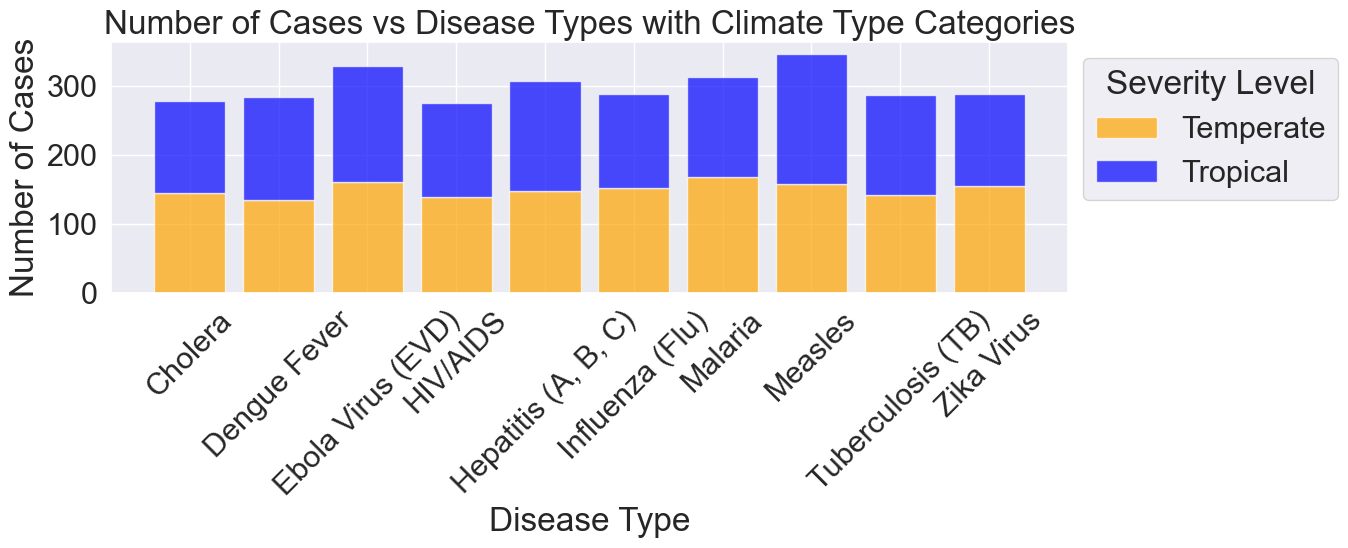

In [86]:
df = pd.DataFrame(Disease_data_EDA)
# Group by 'Disease_Type' and 'Climate_Type', then count occurrences
climate_counts = df.groupby(['Disease_Type', 'Climate_Type']).size().unstack(fill_value=0)

# Plotting the bar chart
plt.figure(figsize=(14, 6))
bottom = None  # Variable to track the bottom of each bar
colors = {'Tropical': 'blue', 'Temperate': 'orange'}

for cat in climate_counts.columns:
    plt.bar(climate_counts.index, climate_counts[cat], label=cat, color=colors[cat], alpha=0.7, bottom=bottom)
    if bottom is None:
        bottom = climate_counts[cat].values
    else:
        bottom += climate_counts[cat].values

# Add labels and title
plt.xlabel('Disease Type')
plt.ylabel('Number of Cases')
plt.title('Number of Cases vs Disease Types with Climate Type Categories')

# Show legend
plt.legend(title='Severity Level', bbox_to_anchor=(1, 1), loc='upper left')

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

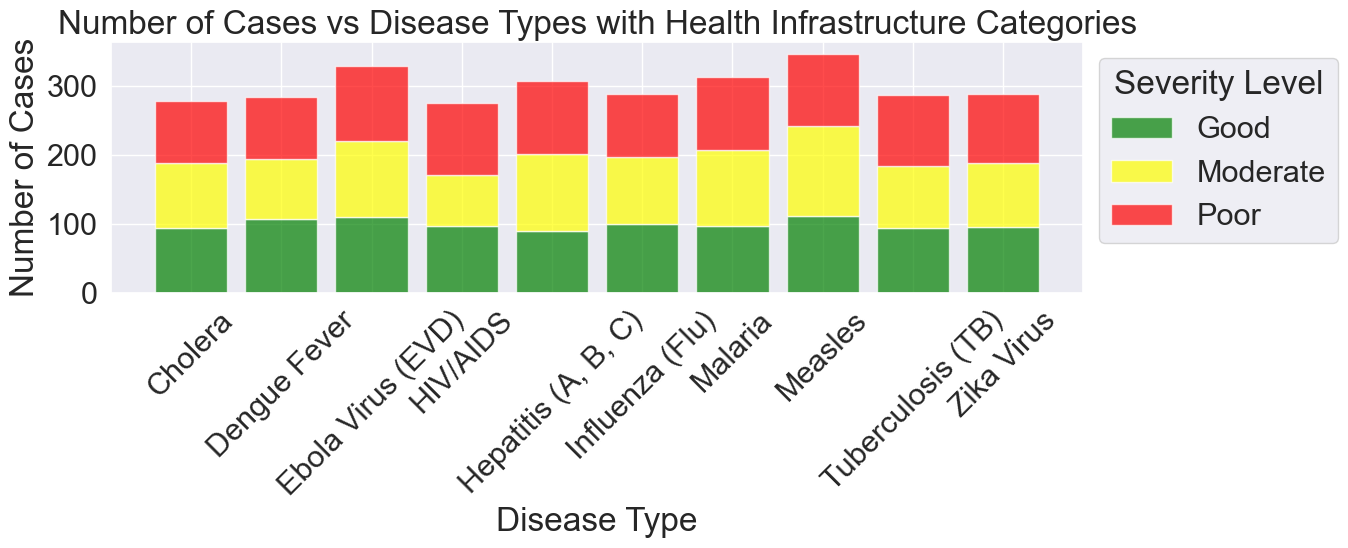

In [88]:
df = pd.DataFrame(Disease_data_EDA)
# Group by 'Disease_Type' and 'Health_Infrastructure', then count occurrences
infra_counts = df.groupby(['Disease_Type', 'Health_Infrastructure']).size().unstack(fill_value=0)

# Plotting the bar chart
plt.figure(figsize=(14, 6))
bottom = None  # Variable to track the bottom of each bar
colors = {'Poor': 'red', 'Moderate': 'yellow', 'Good': 'green'}

for cat in infra_counts.columns:
    plt.bar(infra_counts.index, infra_counts[cat], label=cat, color=colors[cat], alpha=0.7, bottom=bottom)
    if bottom is None:
        bottom = infra_counts[cat].values
    else:
        bottom += infra_counts[cat].values

# Add labels and title
plt.xlabel('Disease Type')
plt.ylabel('Number of Cases')
plt.title('Number of Cases vs Disease Types with Health Infrastructure Categories')

# Show legend
plt.legend(title='Severity Level', bbox_to_anchor=(1, 1), loc='upper left')

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

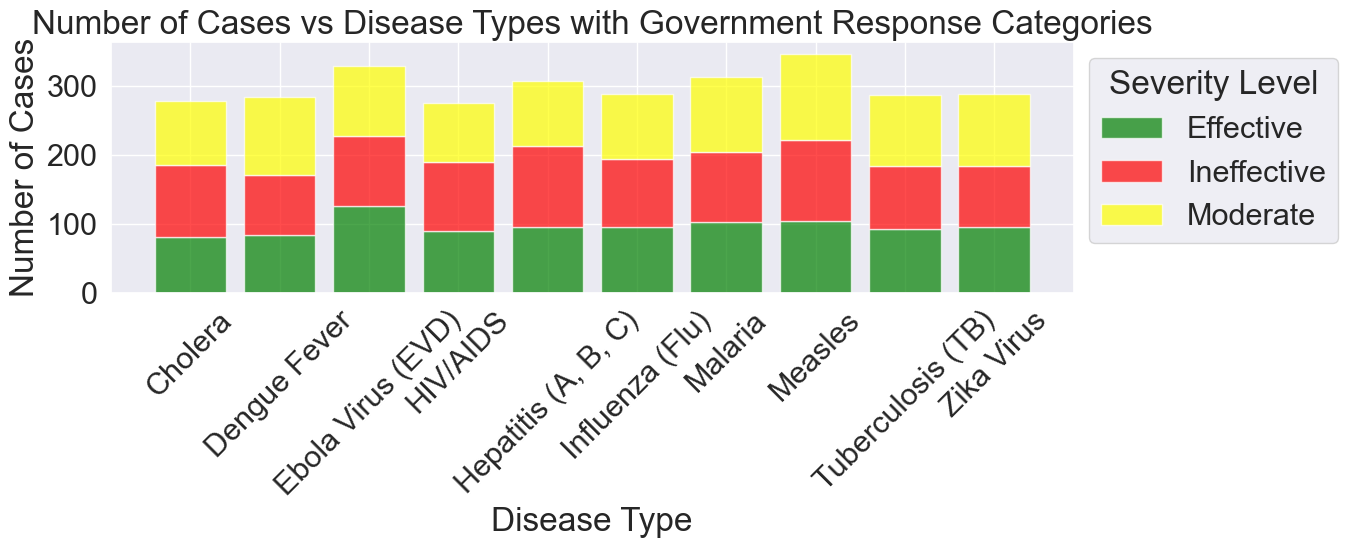

In [90]:
df = pd.DataFrame(Disease_data_EDA)
# Group by 'Disease_Type' and 'Government_Response', then count occurrences
response_counts = df.groupby(['Disease_Type', 'Government_Response']).size().unstack(fill_value=0)

# Plotting the bar chart
plt.figure(figsize=(14, 6))
bottom = None  # Variable to track the bottom of each bar
colors = {'Effective': 'green', 'Moderate': 'yellow', 'Ineffective': 'red'}

for cat in response_counts.columns:
    plt.bar(response_counts.index, response_counts[cat], label=cat, color=colors[cat], alpha=0.7, bottom=bottom)
    if bottom is None:
        bottom = response_counts[cat].values
    else:
        bottom += response_counts[cat].values

# Add labels and title
plt.xlabel('Disease Type')
plt.ylabel('Number of Cases')
plt.title('Number of Cases vs Disease Types with Government Response Categories')

# Show legend
plt.legend(title='Severity Level', bbox_to_anchor=(1, 1), loc='upper left')

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

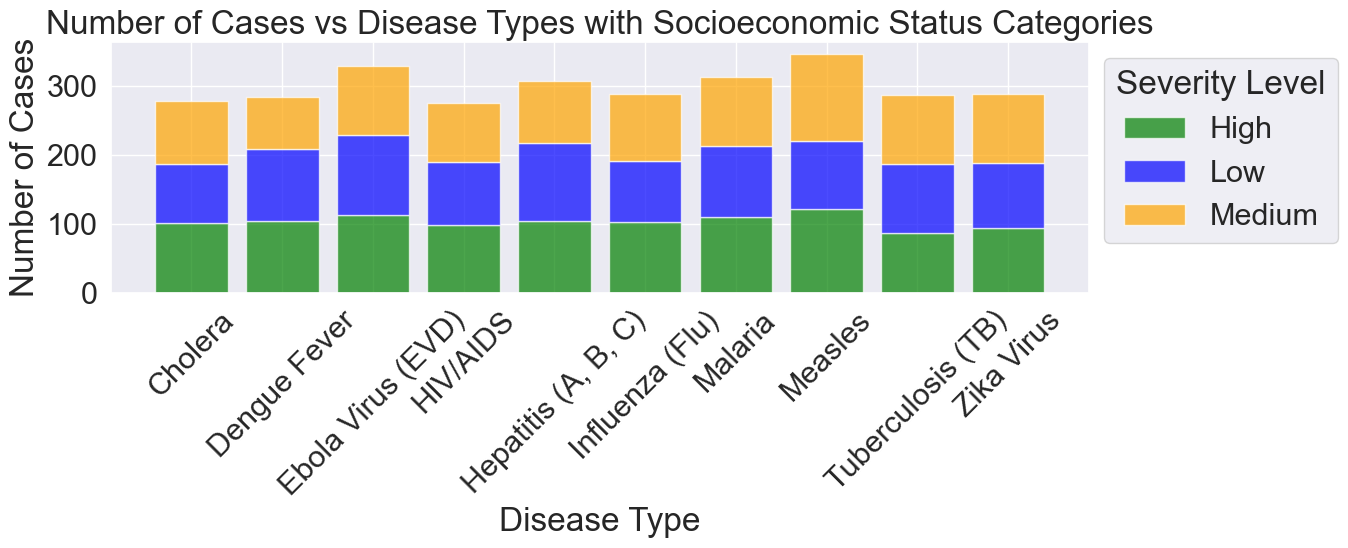

In [92]:
df = pd.DataFrame(Disease_data_EDA)

# Group by 'Disease_Type' and 'Socioeconomic_Status', then count occurrences
status_counts = df.groupby(['Disease_Type', 'Socioeconomic_Status']).size().unstack(fill_value=0)

# Plotting the bar chart
plt.figure(figsize=(14, 6))
bottom = None  # Variable to track the bottom of each bar
colors = {'Low': 'blue', 'Medium': 'orange', 'High': 'green'}

for cat in status_counts.columns:
    plt.bar(status_counts.index, status_counts[cat], label=cat, color=colors[cat], alpha=0.7, bottom=bottom)
    if bottom is None:
        bottom = status_counts[cat].values
    else:
        bottom += status_counts[cat].values

# Add labels and title
plt.xlabel('Disease Type')
plt.ylabel('Number of Cases')
plt.title('Number of Cases vs Disease Types with Socioeconomic Status Categories')

# Show legend
plt.legend(title='Severity Level', bbox_to_anchor=(1, 1), loc='upper left')

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

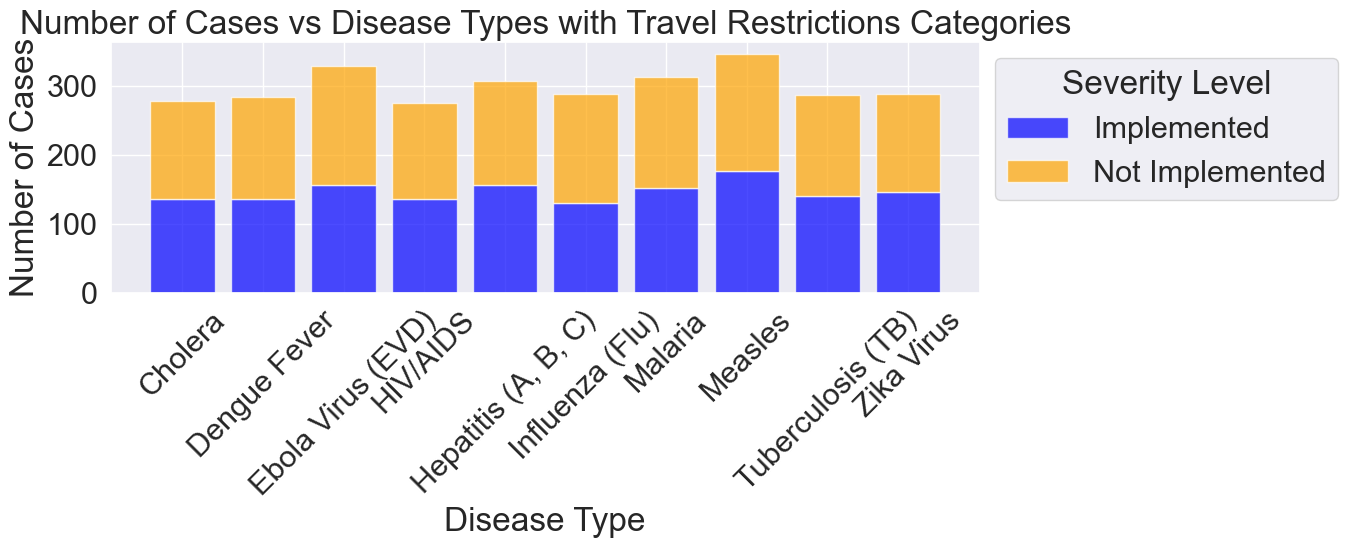

In [94]:
df = pd.DataFrame(Disease_data_EDA)
# Group by 'Disease_Type' and 'Travel_Restrictions', then count occurrences
travel_counts = df.groupby(['Disease_Type', 'Travel_Restrictions']).size().unstack(fill_value=0)

# Plotting the bar chart
plt.figure(figsize=(14, 6))
bottom = None  # Variable to track the bottom of each bar
colors = {'Implemented': 'blue', 'Not Implemented': 'orange'}

for cat in travel_counts.columns:
    plt.bar(travel_counts.index, travel_counts[cat], label=cat, color=colors[cat], alpha=0.7, bottom=bottom)
    if bottom is None:
        bottom = travel_counts[cat].values
    else:
        bottom += travel_counts[cat].values

# Add labels and title
plt.xlabel('Disease Type')
plt.ylabel('Number of Cases')
plt.title('Number of Cases vs Disease Types with Travel Restrictions Categories')

# Show legend
plt.legend(title='Severity Level', bbox_to_anchor=(1, 1), loc='upper left')

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

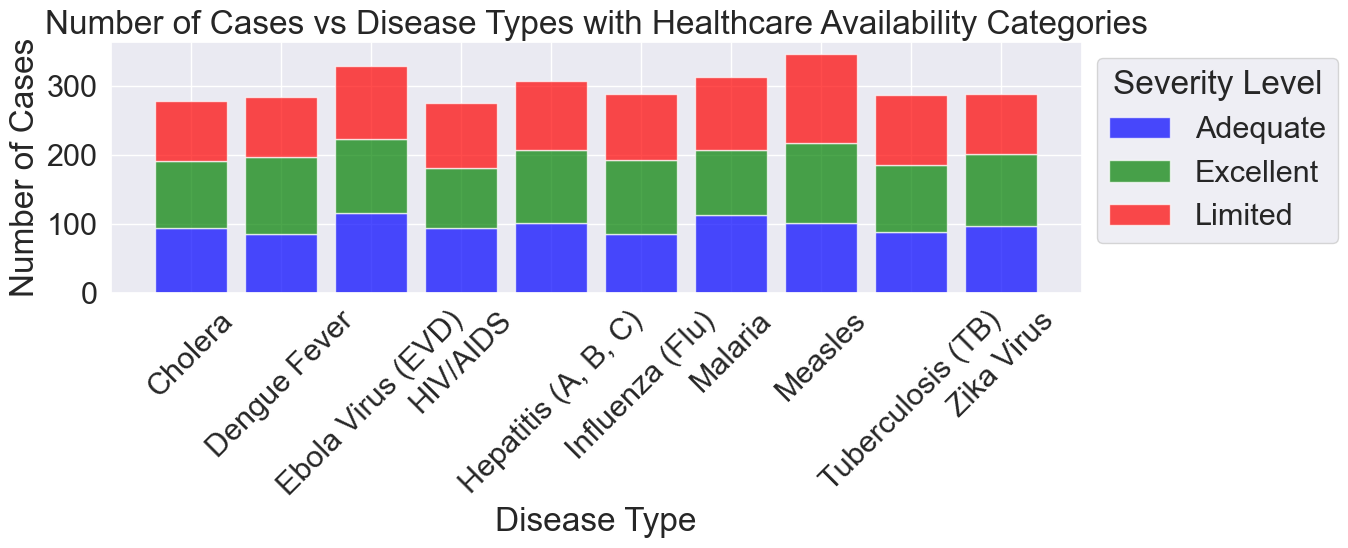

In [96]:
df = pd.DataFrame(Disease_data_EDA)

# Filter the DataFrame to include only limited, excellent, and adequate Healthcare_Availability
df_filtered = df[df['Healthcare_Availability'].isin(['Limited', 'Excellent', 'Adequate'])]

# Group by 'Disease_Type' and 'Healthcare_Availability', then count occurrences
healthcare_counts = df_filtered.groupby(['Disease_Type', 'Healthcare_Availability']).size().unstack(fill_value=0)

# Plotting the bar chart
plt.figure(figsize=(14, 6))
bottom = None  # Variable to track the bottom of each bar
colors = {'Limited': 'red', 'Excellent': 'green', 'Adequate': 'blue'}

for cat in healthcare_counts.columns:
    plt.bar(healthcare_counts.index, healthcare_counts[cat], label=cat, color=colors[cat], alpha=0.7, bottom=bottom)
    if bottom is None:
        bottom = healthcare_counts[cat].values
    else:
        bottom += healthcare_counts[cat].values

# Add labels and title
plt.xlabel('Disease Type')
plt.ylabel('Number of Cases')
plt.title('Number of Cases vs Disease Types with Healthcare Availability Categories')

# Show legend
plt.legend(title='Severity Level', bbox_to_anchor=(1, 1), loc='upper left')

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

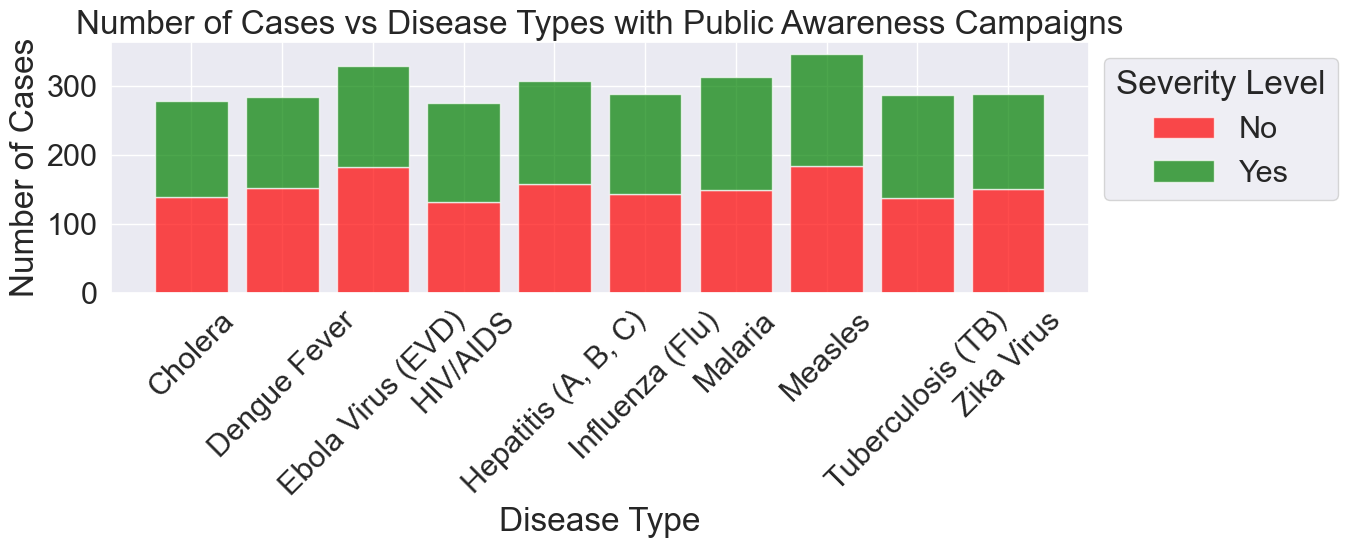

In [98]:
df = pd.DataFrame(Disease_data_EDA)

# Filter the DataFrame to include only 'Yes' and 'No' for Public_Awareness_Campaigns
df_filtered = df[df['Public_Awareness_Campaigns'].isin(['Yes', 'No'])]

# Group by 'Disease_Type' and 'Public_Awareness_Campaigns', then count occurrences
campaign_counts = df_filtered.groupby(['Disease_Type', 'Public_Awareness_Campaigns']).size().unstack(fill_value=0)

# Plotting the bar chart
plt.figure(figsize=(14, 6))
bottom = None  # Variable to track the bottom of each bar
colors = {'Yes': 'green', 'No': 'red'}

for cat in campaign_counts.columns:
    plt.bar(campaign_counts.index, campaign_counts[cat], label=cat, color=colors[cat], alpha=0.7, bottom=bottom)
    if bottom is None:
        bottom = campaign_counts[cat].values
    else:
        bottom += campaign_counts[cat].values

# Add labels and title
plt.xlabel('Disease Type')
plt.ylabel('Number of Cases')
plt.title('Number of Cases vs Disease Types with Public Awareness Campaigns')

# Show legend
plt.legend(title='Severity Level', bbox_to_anchor=(1, 1), loc='upper left')

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

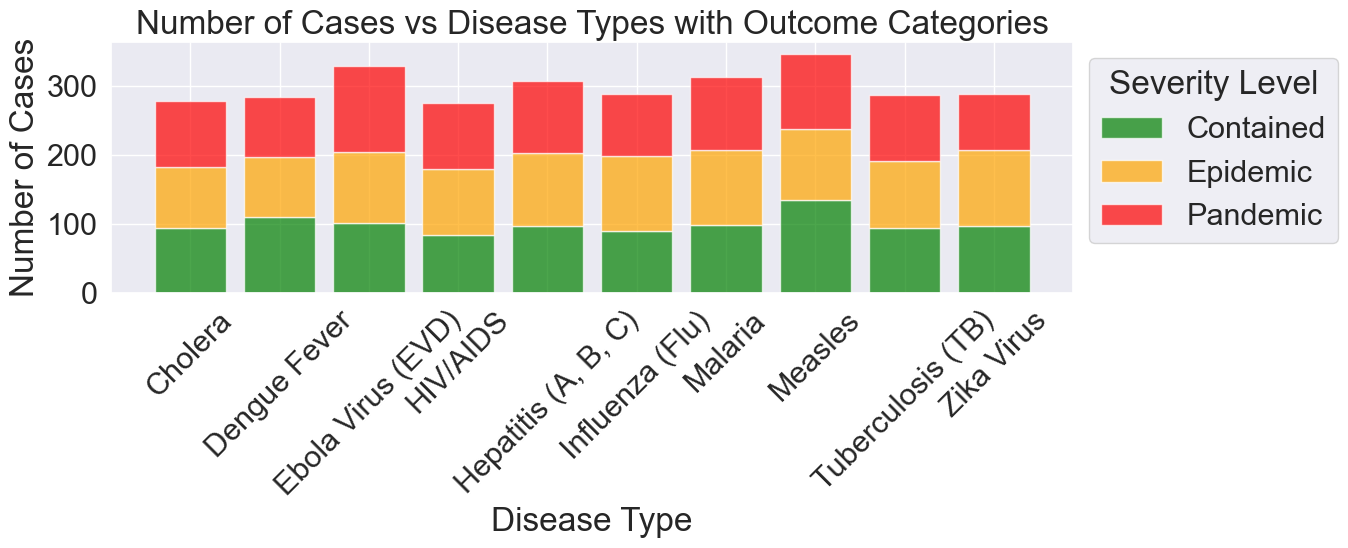

In [99]:
df = pd.DataFrame(Disease_data_EDA)
# Filter the DataFrame to include only 'Contained', 'Epidemic', and 'Pandemic' for Outcome
df_filtered = df[df['Outcome'].isin(['Contained', 'Epidemic', 'Pandemic'])]

# Group by 'Disease_Type' and 'Outcome', then count occurrences
outcome_counts = df_filtered.groupby(['Disease_Type', 'Outcome']).size().unstack(fill_value=0)

# Plotting the bar chart
plt.figure(figsize=(14, 6))
bottom = None  # Variable to track the bottom of each bar
colors = {'Contained': 'green', 'Epidemic': 'orange', 'Pandemic': 'red'}

for cat in outcome_counts.columns:
    plt.bar(outcome_counts.index, outcome_counts[cat], label=cat, color=colors[cat], alpha=0.7, bottom=bottom)
    if bottom is None:
        bottom = outcome_counts[cat].values
    else:
        bottom += outcome_counts[cat].values

# Add labels and title
plt.xlabel('Disease Type')
plt.ylabel('Number of Cases')
plt.title('Number of Cases vs Disease Types with Outcome Categories')

# Show legend
plt.legend(title='Severity Level', bbox_to_anchor=(1, 1), loc='upper left')

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                                  Number_of_Cases  Disease_Type_Label  \
Number_of_Cases                          1.000000           -0.000640   
Disease_Type_Label                      -0.000640            1.000000   
Severity_Level_Label                    -0.007244            0.003216   
Population_Density_Label                -0.011736           -0.036192   
Climate_Type_Label                       0.015530           -0.009223   
Health_Infrastructure_Label              0.022553            0.014272   
Government_Response_Label               -0.014254            0.004587   
Socioeconomic_Status_Label              -0.009745            0.037588   
Travel_Restrictions_Label               -0.002540           -0.012491   
Healthcare_Availability_Label           -0.030229            0.014965   
Vaccination_Coverage_Label               0.008924            0.006334   
Public_Awareness_Campaigns_Label         0.022333            0.009843   
Outcome_Label                           -0.004062  

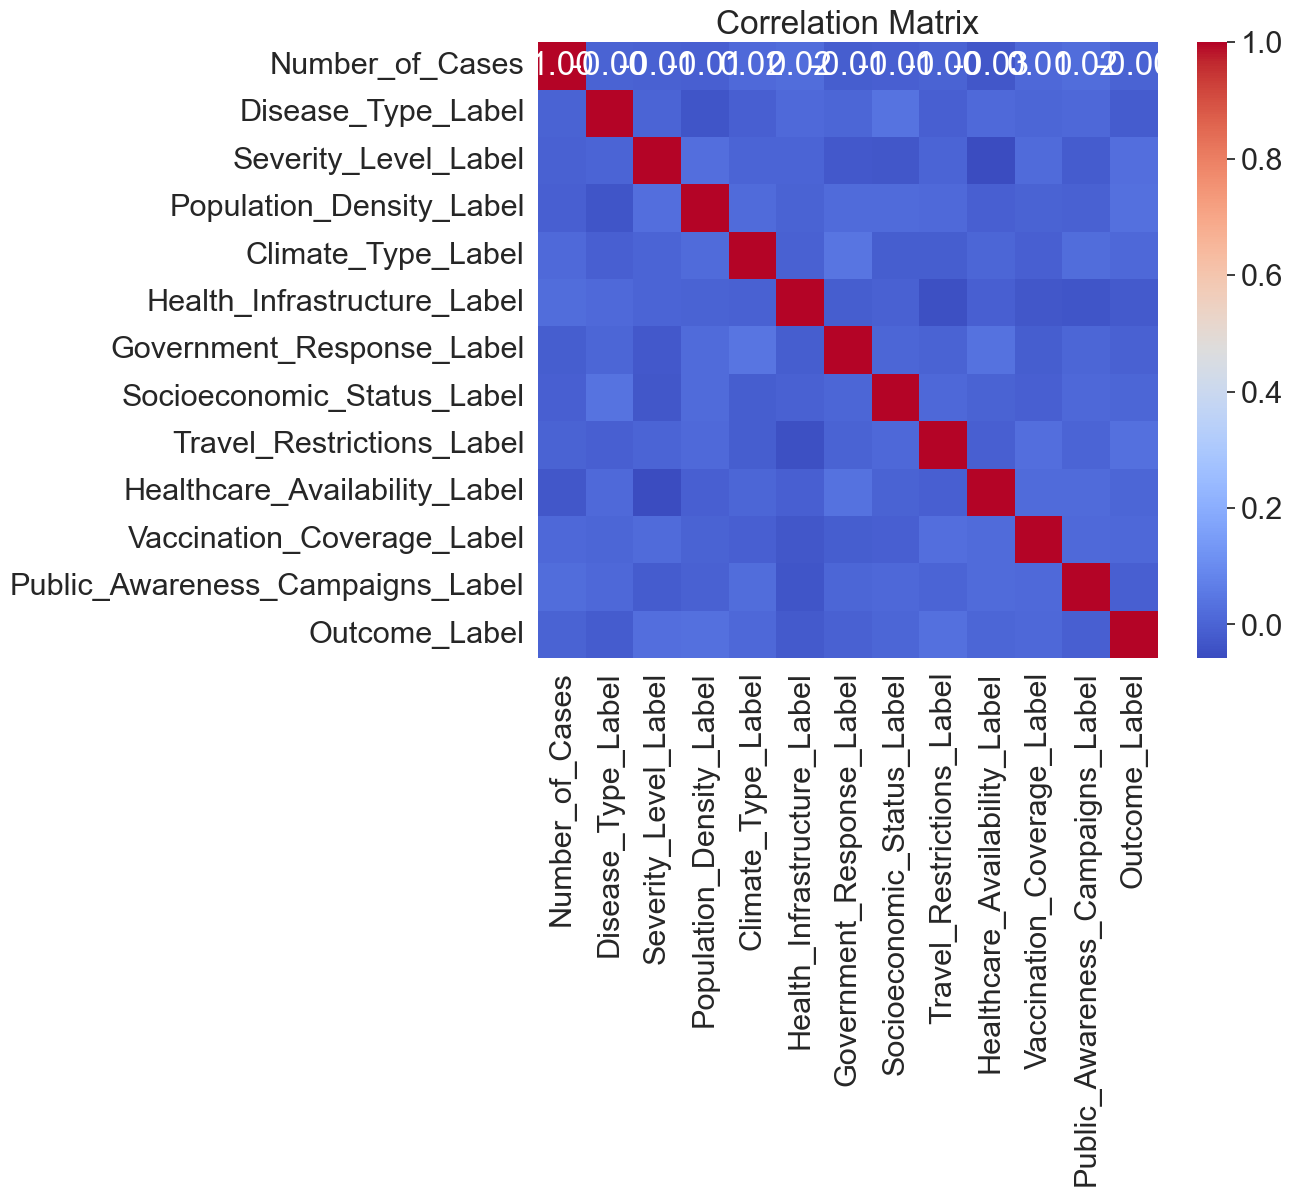

In [102]:
df = pd.DataFrame(Disease_data_numerical)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Print correlation matrix or display heatmap
print(correlation_matrix)

# Optional: Display heatmap for visual representation
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

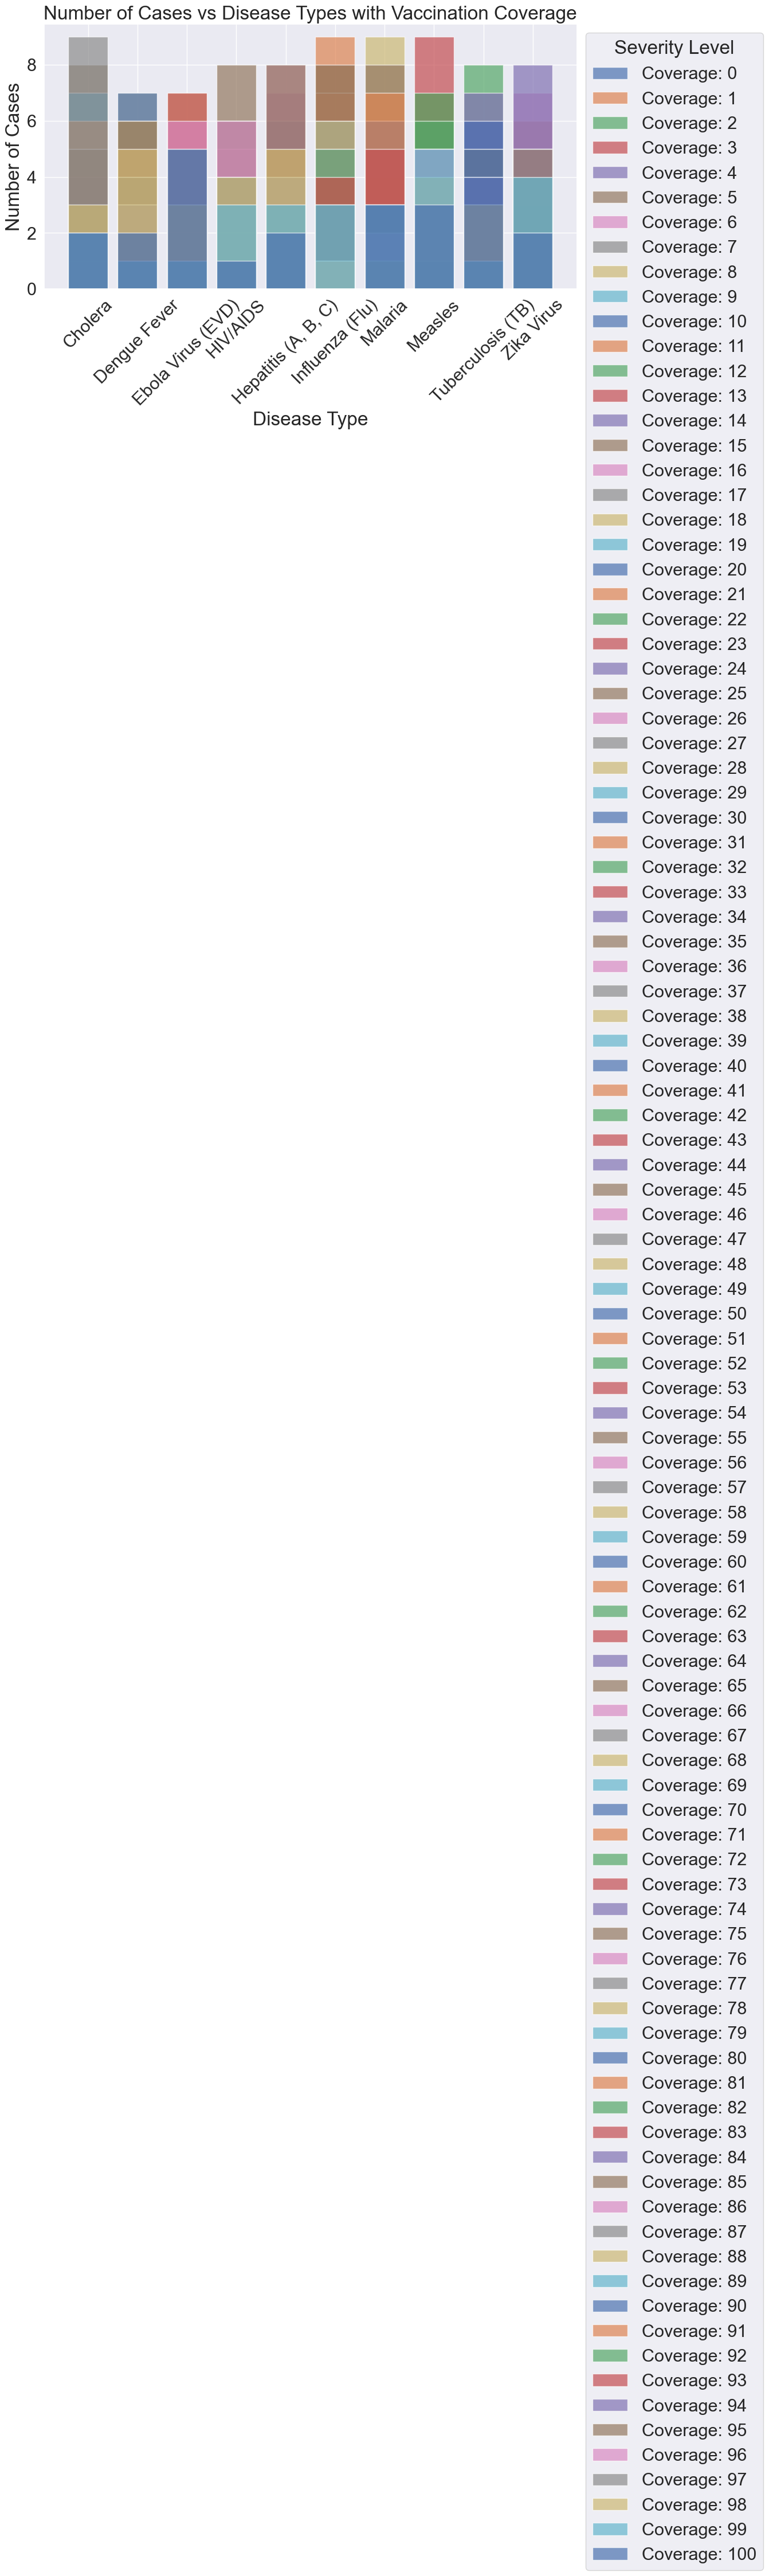

In [100]:
df = pd.DataFrame(Disease_data_EDA)

# Group by 'Disease_Type' and 'Vaccination_Coverage', then count occurrences
coverage_counts = df.groupby(['Disease_Type', 'Vaccination_Coverage']).size().unstack(fill_value=0)

# Plotting the bar chart
plt.figure(figsize=(12, 6))

# Loop through each Vaccination_Coverage value and plot bars with different colors
for coverage in coverage_counts.columns:
    plt.bar(coverage_counts.index, coverage_counts[coverage], label=f'Coverage: {coverage}', alpha=0.7)

# Add labels and title
plt.xlabel('Disease Type')
plt.ylabel('Number of Cases')
plt.title('Number of Cases vs Disease Types with Vaccination Coverage')

# Show legend
plt.legend(title='Severity Level', bbox_to_anchor=(1, 1), loc='upper left')

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Statistical tests to determine relationships between variables (Chi-square test for categorical variables, t-tests and ANOVA for numerical variables)

In [105]:
from scipy.stats import chi2_contingency

# Load your dataset
# Replace 'your_dataset.csv' with the actual filename or URL
df = pd.DataFrame(Disease_data_EDA)

# Contingency table (cross-tabulation)
contingency_table = pd.crosstab(df['Number_of_Cases'], df['Healthcare_Availability'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

Chi-square statistic: 1902.4927958202147
P-value: 0.58236120235277
Degrees of freedom: 1916


In [106]:
from scipy.stats import ttest_ind

# Assuming 'Group1' and 'Group2' are numerical columns in your DataFrame
group1 = df['Number_of_Cases']
group2 = df['Vaccination_Coverage']

# Perform independent T-test
t_stat, p_value = ttest_ind(group1, group2)

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 85.77220208540432
P-value: 0.0


In [108]:
from scipy.stats import f_oneway

# Assuming 'Group1', 'Group2', and 'Group3' are numerical columns in your DataFrame
group1 = df['Date']
group2 = df['Number_of_Cases']
group3 = df['Vaccination_Coverage']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(group1, group2, group3)

# Print results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 20017.909937124954
P-value: 0.0
